In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
url  = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
X = df[['Latitude','Longitude','MedInc']]
X.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [4]:
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 674)

X_train.head()

,Latitude,Longitude,MedInc
6819,34.09,-118.09,3.0125
5990,34.10,-117.73,5.8891
13824,34.49,-117.17,2.0136
18162,37.36,-122.04,6.8753
6181,34.08,-117.92,5.7039


Applying K-Means

In [5]:
km = KMeans(n_clusters = 6,
             init='random',
             n_init=12,
             max_iter=1000,
             tol = 1e-06,
            random_state=1)
y_train = km.fit_predict(X_train)

In [6]:
X_train['cluster'] = y_train
X_train.head()

,Latitude,Longitude,MedInc,cluster
6819,34.09,-118.09,3.0125,4
5990,34.10,-117.73,5.8891,2
13824,34.49,-117.17,2.0136,4
18162,37.36,-122.04,6.8753,1
6181,34.08,-117.92,5.7039,2


Graphing the scatterplots from the different 2D view.

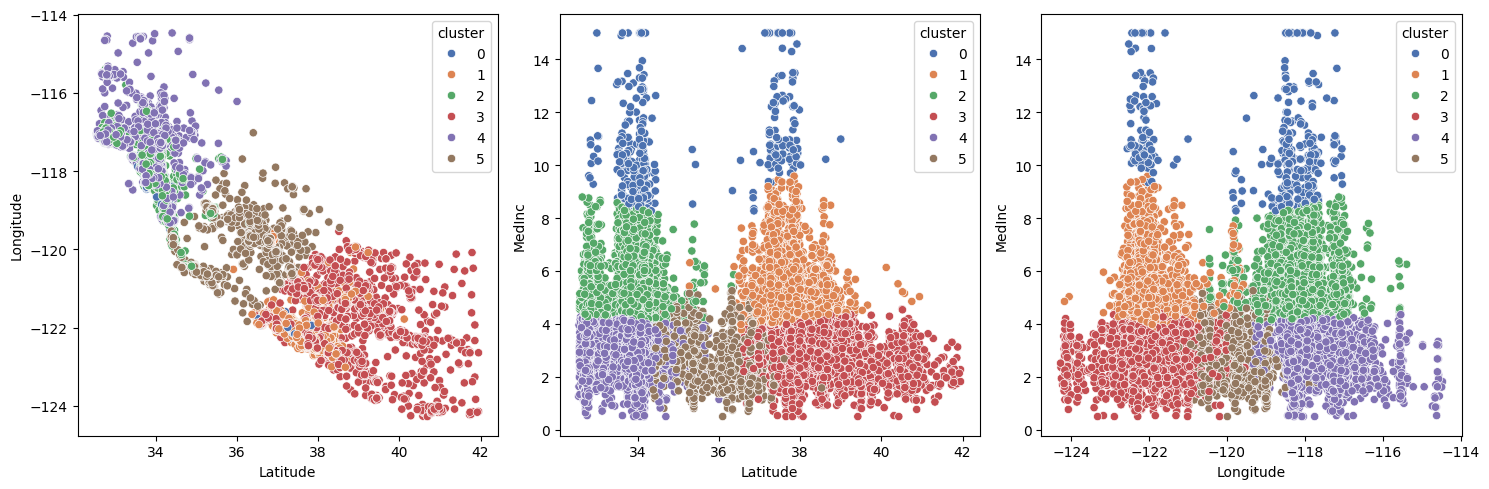

In [7]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

In [8]:
y_test = list(km.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,Latitude,Longitude,MedInc,cluster
3469,34.30,-118.47,3.6736,4
20296,34.16,-119.19,4.4187,2
15096,32.81,-116.96,2.9097,4
1249,39.13,-122.09,2.3310,3
177,37.80,-122.24,2.6292,3


Checking if the clustering model is well applied plotting the test cluster points over the train set

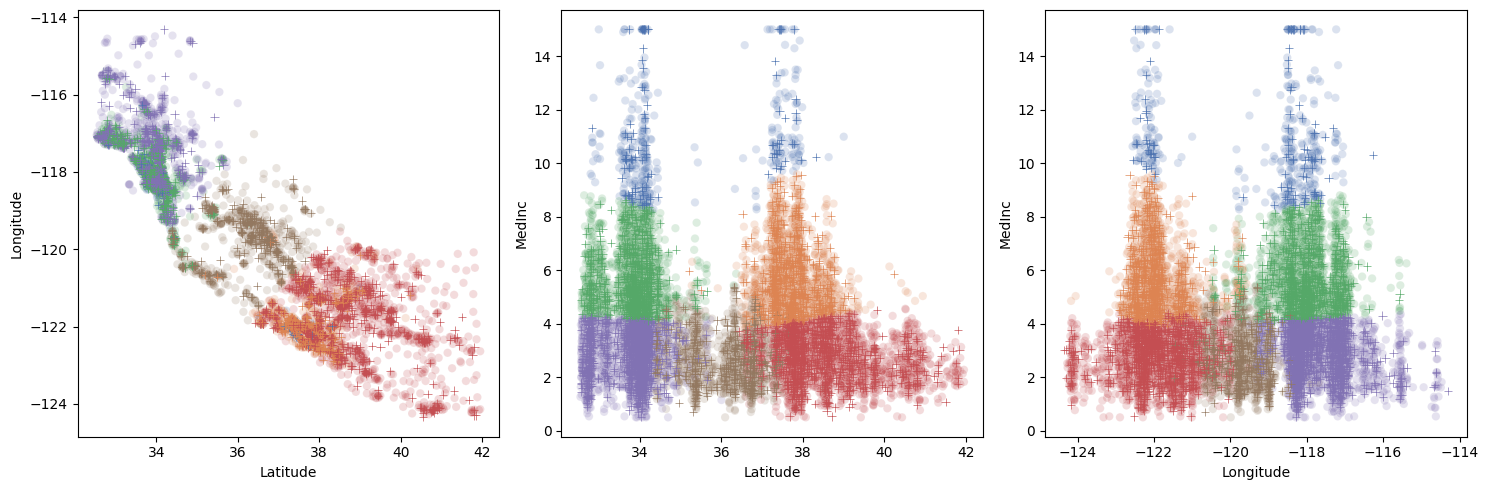

In [9]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.2)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.2)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.2)


sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

The model is well trained and it can predict the cluster to which a data set belongs

I choose a random forest because there is no linearity between the variables, there is no need to normalize and the ramdom forest are good for categorization.

In [10]:
model_sup = RandomForestClassifier(random_state = 600)
model_sup.fit(X_train, y_train)

RandomForestClassifier(random_state=600)

In [11]:
y_pred = model_sup.predict(X_test)
y_pred

array([4, 2, 4, ..., 3, 1, 1], dtype=int32)

In [12]:
accuracy_score(y_test, y_pred)

1.0

In [13]:
X_train.to_csv("/workspaces/K-means-project/data/processed/clean_train.csv", index = False)
X_test.to_csv("/workspaces/K-means-project/data/processed/clean_test.csv", index = False)